[scikit-learn Document](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)에서 decision tree 모델에 여러 가지 옵션이 있는 것을 확인 할 수 있다. 가장 중요한 옵션은 트리의 depth를 결정하는것이다.

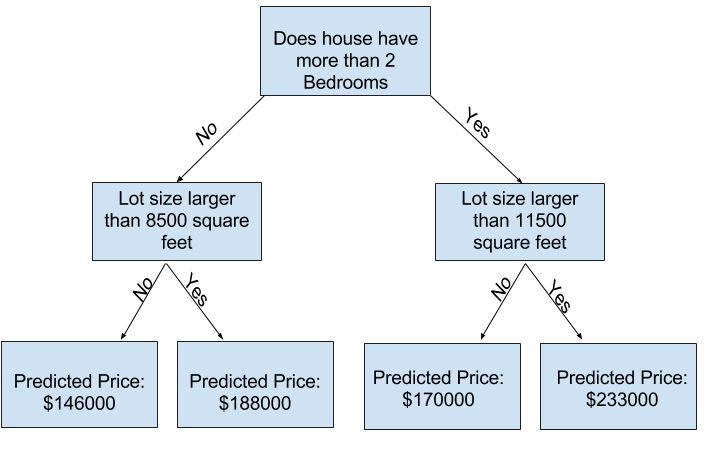

overfitting이 되면 모델은 training data와 거의 완벽하게 일치하지만 새로운 데이터에 대한 처리를 못한다.<br>
underfitting의 경우 모델이 데이터에서 중요한 차이와 패턴을 찾지 못해 training data에도 성능이 저하된다.

validation data를 통해 추정하는 새로운 데이터의 정확성에 관심이 있으므로 underfitting과 overfitting 사이의 좋은 지점을 찾아야한다.

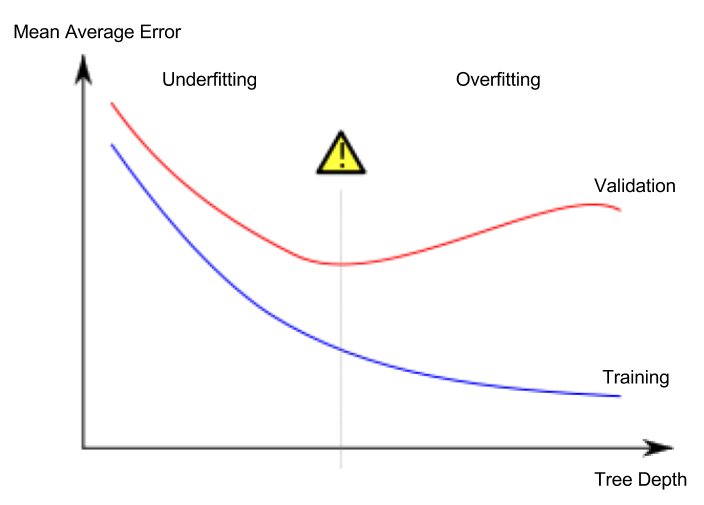

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [3]:
import pandas as pd

melbourne_file_path = '../input/melbourne-housing-snapshot/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)

filtered_melbourne_data = melbourne_data.dropna(axis=0)

y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea',
                     'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [4]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d \t\t Mean Absolute Error: %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5 		 Mean Absolute Error: 347380
Max leaf nodes: 50 		 Mean Absolute Error: 258171
Max leaf nodes: 500 		 Mean Absolute Error: 243495
Max leaf nodes: 5000 		 Mean Absolute Error: 254983
